# Te damos la bienvenida a Colab

## Google Colab está disponible en VS Code.
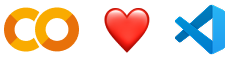

Prueba la nueva <a href="https://marketplace.visualstudio.com/items?itemName=Google.colab">extensión de Google Colab</a> para Visual Studio Code. Puedes comenzar a publicar anuncios con solo unos clics:

*  En VS Code, abre la vista <strong><em>Extensions</em></strong> y busca "Google Colab" para instalarlo.
*  Para abrir el selector de kernel, crea o abre cualquier archivo de cuaderno <code>.ipynb</code> en tu espacio de trabajo local, y ejecuta una celda o haz clic en el botón <strong><em>Select Kernel</em></strong> en la parte superior derecha.
*  Haz clic en <strong><em>Colab</em></strong> y, luego, selecciona el entorno de ejecución que desees, accede con tu Cuenta de Google y ya estará todo listo.

Obtén más detalles en nuestro <a href="https://developers.googleblog.com/google-colab-is-coming-to-vs-code">blog de anuncios aquí</a>.

## 🎁 Plan Pro gratis para Gemini y Colab para estudiantes universitarios de EE.UU. 🎓

Obtén un mayor nivel de acceso a nuestro modelo más preciso, Gemini 3 Pro, y realiza tareas de programación avanzada, investigaciones complejas y proyectos innovadores con el respaldo de los recursos de cálculo de alto rendimiento y específicos de Colab para ciencia de datos y aprendizaje automático.

Obtén la oferta gratuita de Gemini en <a href="https://gemini.google/students?utm_source=colab&amp;utm_medium=banner&amp;utm_campaign=students_xpa_us-colab-banner">gemini.google/students</a>.  
Obtén la oferta gratuita de Colab en <a href="https://colab.research.google.com/signup">colab.research.google.com/signup</a>.  
Se aplican condiciones.

## Accede a modelos de IA populares a través de Google-Colab-AI sin una clave de API
Todos los usuarios tienen acceso a los LLM más populares a través de la biblioteca de Python <code>google-colab-ai</code>, y los usuarios que pagan tienen acceso a una selección más amplia de modelos. Para obtener más información, consulta la <a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Getting_started_with_google_colab_ai.ipynb">guía de introducción a Google Colab AI</a>.



In [ ]:
from google.colab import ai
response = ai.generate_text("What is the capital of France?")

## Explora la API de Gemini
La API de Gemini te brinda acceso a los modelos de Gemini creados por Google DeepMind. Los modelos de Gemini se desarrollan desde un principio para ser multimodales, por lo que puedes razonar sin problemas en texto, imágenes, código y audio.

**Cómo comenzar**
*  Ve a <a href="https://aistudio.google.com/">Google AI Studio</a> y accede con tu Cuenta de Google.
*  <a href="https://aistudio.google.com/app/apikey">Crea una clave de API</a>.
* Usa una guía de inicio rápido de <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Get_started.ipynb">Python</a> o llama a la API de REST con <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/rest/Prompting_REST.ipynb">curl</a>.

**Descubre las funciones avanzadas de Gemini**
*  Juega con los <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Image-out.ipynb">resultados multimodales</a> de Gemini combinando texto e imágenes de forma iterativa.
*  Descubre la <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Get_started_LiveAPI.ipynb">API de multimodal Live</a> &#40;demostración <a href="https://aistudio.google.com/live">aquí</a>&#41;.
*  Aprende a <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Spatial_understanding.ipynb&quot;">analizar imágenes y detectar elementos en tus fotos</a> con Gemini &#40;¡también hay una <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Spatial_understanding_3d.ipynb">versión en 3D</a>!&#41;.
*  Aprovecha el poder del <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Get_started_thinking.ipynb">modelo de pensamiento de Gemini</a>, capaz de resolver tareas complejas con sus pensamientos internos.
      
**Explora casos de uso complejos**
*  Usa las <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Search_grounding_for_research_report.ipynb">funciones de fundamentación de Gemini</a> para crear un informe sobre una empresa basado en lo que el modelo encuentra en Internet.
*  Extrae <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Pdf_structured_outputs_on_invoices_and_forms.ipynb">facturas y datos de formularios de archivos PDF</a> de forma estructurada.
*  Usa Imagen y la ventana de contexto grande de Gemini para crear <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Book_illustration.ipynb">ilustraciones basadas en un libro completo</a>.

Para obtener más información, consulta la <a href="https://github.com/google-gemini/cookbook">guía de soluciones de Gemini</a> o visita la <a href="https://ai.google.dev/docs/">documentación de la API de Gemini</a>.


Ahora, Colab tiene funciones basadas en IA con la tecnología de <a href="https://gemini.google.com">Gemini</a>. En el siguiente video, se muestra cómo usar estas funciones, ya sea que estés dando tus primeros pasos con Python o tengas bastante experiencia.

<center>
  <a href="https://www.youtube.com/watch?v=V7RXyqFUR98" target="_blank">
  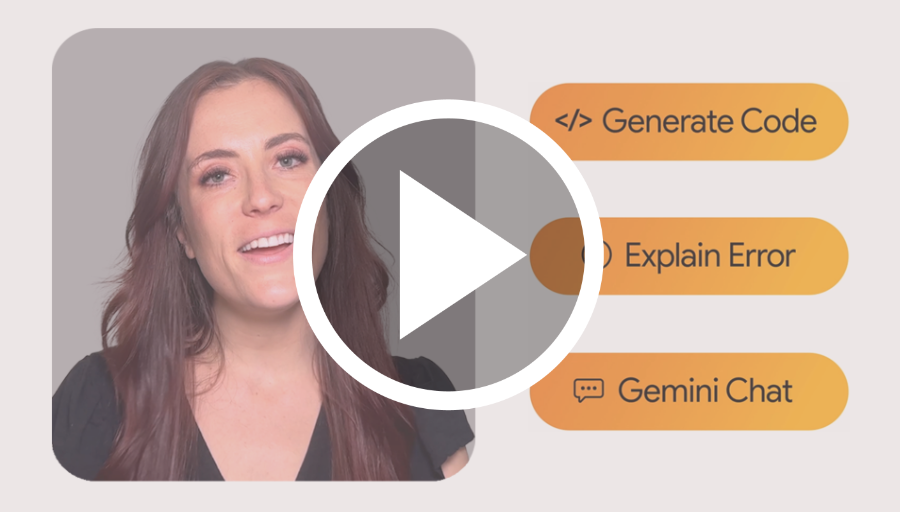
  </a>
</center>

<div class="markdown-google-sans">
  <h2>¿Qué es Colab?</h2>
</div>

Colab, o "Colaboratory", te permite escribir y ejecutar código de Python en tu navegador, con
- Sin configuración requerida
- Acceso sin costo a GPU
- Facilidad para compartir

Ya seas <strong>estudiante</strong>, <strong>científico de datos</strong> o <strong>investigador de IA</strong>, Colab facilita tu trabajo. Mira <a href="https://www.youtube.com/watch?v=inN8seMm7UI">este video introductorio sobre Colab</a> o <a href="https://www.youtube.com/watch?v=rNgswRZ2C1Y">descubre funciones de Colab que tal vez te hayas perdido</a> para obtener más información, o bien comienza a usarlo a continuación.

<div class="markdown-google-sans">

## <strong>Introducción</strong>
</div>

El documento que estás leyendo no es una página web estática, sino un entorno interactivo denominado <strong>notebook de Colab</strong>, que permite escribir y ejecutar código.

Por ejemplo, esta es una <strong>celda de código</strong> con una secuencia de comandos Python corta que calcula un valor, lo almacena en una variable y devuelve el resultado:

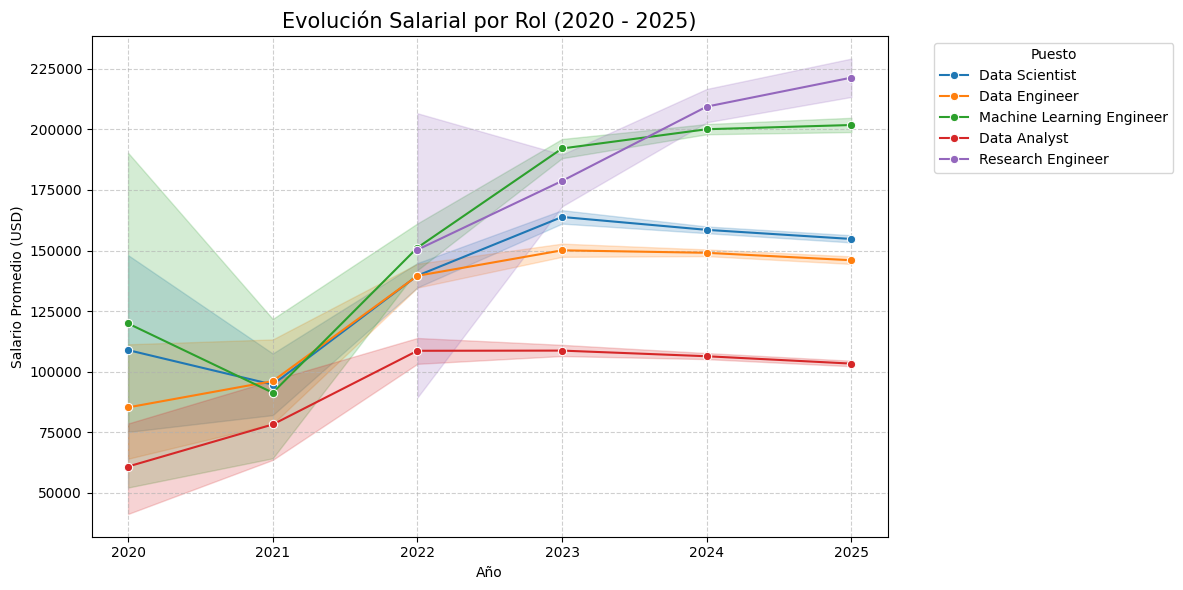


--- % DE CRECIMIENTO SALARIAL (2024 vs 2025) ---
job_title
Research Engineer            5.710554
Machine Learning Engineer    0.871100
Data Engineer               -2.058583
Data Scientist              -2.372391
Data Analyst                -2.855688
dtype: float64


In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. LEER LOS DATOS
# Cargamos el archivo que subiste
df = pd.read_csv('salaries.csv')

# 2. SELECCIONAR EL "TOP 5" DE ROLES
# Hay muchos nombres de puestos, vamos a filtrar los más importantes para que la gráfica se entienda
top_roles = ['Data Scientist', 'Data Engineer', 'Data Analyst', 'Machine Learning Engineer', 'Research Engineer']
df_top = df[df['job_title'].isin(top_roles)]

# 3. CREAR LA GRÁFICA DE EVOLUCIÓN
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_top, x='work_year', y='salary_in_usd', hue='job_title', marker='o')

# Personalización para que se vea profesional
plt.title('Evolución Salarial por Rol (2020 - 2025)', fontsize=15)
plt.ylabel('Salario Promedio (USD)')
plt.xlabel('Año')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Puesto', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()


plt.savefig('grafica_evolucion.png', dpi=300, bbox_inches='tight')


plt.show()

# 4. CALCULAR EL CRECIMIENTO
# Comparamos el promedio de 2024 contra el de 2025
promedios = df_top.groupby(['work_year', 'job_title'])['salary_in_usd'].mean().unstack()
crecimiento = ((promedios.loc[2025] - promedios.loc[2024]) / promedios.loc[2024]) * 100
print("\n--- % DE CRECIMIENTO SALARIAL (2024 vs 2025) ---")
print(crecimiento.sort_values(ascending=False))

/tmp/ipython-input-8665956.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Modalidad', y='salary_in_usd', data=df, palette='Set2')


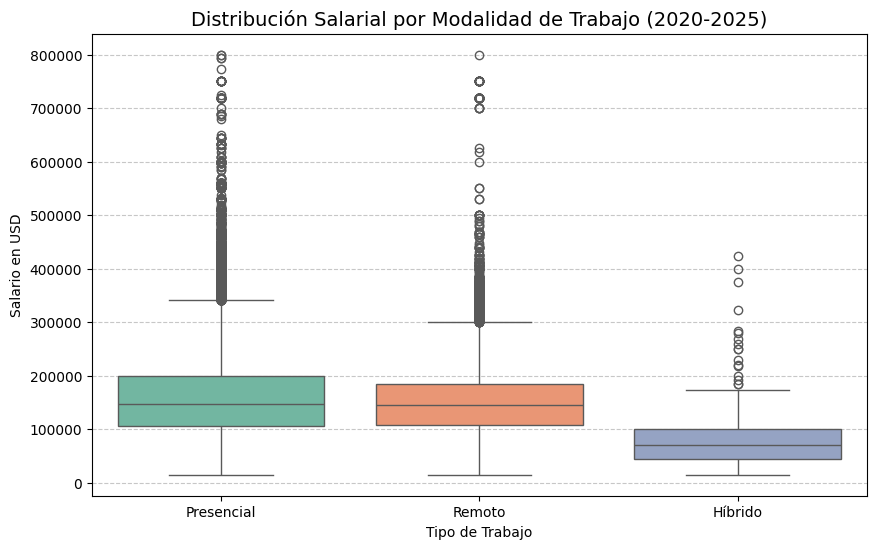

--- SALARIO PROMEDIO POR MODALIDAD ---
Modalidad
Presencial    159382.780154
Remoto        151285.861599
Híbrido        81711.629179
Name: salary_in_usd, dtype: float64


In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Cargar datos
df = pd.read_csv('salaries.csv')

# 2. Mapear los números a etiquetas legibles
# Creamos una nueva columna llamada 'Modalidad'
mapeo = {0: 'Presencial', 50: 'Híbrido', 100: 'Remoto'}
df['Modalidad'] = df['remote_ratio'].map(mapeo)

# 3. Crear la gráfica de caja (Boxplot)
# El boxplot es genial porque muestra el promedio y la dispersión (qué tanto varían los sueldos)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Modalidad', y='salary_in_usd', data=df, palette='Set2')

plt.title('Distribución Salarial por Modalidad de Trabajo (2020-2025)', fontsize=14)
plt.ylabel('Salario en USD')
plt.xlabel('Tipo de Trabajo')
plt.grid(axis='y', linestyle='--', alpha=0.7)



# Guardamos con un nombre diferente
plt.savefig('grafica_modalidad.png', dpi=300, bbox_inches='tight')

# Mostramos en pantalla
plt.show()


# 4. Resumen estadístico simple
print("--- SALARIO PROMEDIO POR MODALIDAD ---")
print(df.groupby('Modalidad')['salary_in_usd'].mean().sort_values(ascending=False))

A fin de ejecutar el código en la celda anterior, haz clic en él para seleccionarlo y luego presiona el botón de reproducción ubicado a la izquierda del código o usa la combinación de teclas "Command/Ctrl + Intro". Para editar el código, solo haz clic en la celda y comienza a editar.

Las variables que defines en una celda pueden usarse en otras:

In [ ]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

Los notebooks de Colab te permiten combinar <strong>código ejecutable</strong> y <strong>texto enriquecido</strong> en un único documento, junto con <strong>imágenes</strong>, <strong>HTML</strong>, <strong>LaTeX</strong> y mucho más. Los notebooks que crees en Colab se almacenan en tu cuenta de Google Drive. Puedes compartir fácilmente los notebooks de Colab con amigos o compañeros de trabajo para que realicen comentarios o los editen. Si quieres obtener más información, consulta la <a href="/notebooks/basic_features_overview.ipynb">Descripción general de Colab</a>. Para crear un nuevo notebook de Colab, ve al menú Archivo que aparece más arriba o usa este vínculo: <a href="http://colab.research.google.com#create=true">crear un nuevo notebook de Colab</a>.

Los notebooks de Colab son notebooks de Jupyter que aloja Colab. Para obtener más información sobre el proyecto Jupyter, visita <a href="https://www.jupyter.org">jupyter.org</a>.

<div class="markdown-google-sans">

## Ciencia de datos
</div>

Con Colab, puedes aprovechar por completo las bibliotecas más populares de Python para analizar y visualizar datos. La celda de código que se incluye a continuación usa <strong>NumPy</strong> para generar algunos datos aleatorios y <strong>matplotlib</strong> para visualizarlos. Para editar el código, haz clic en la celda y comienza a editar.

Puedes importar datos propios a notebooks de Colab desde tu cuenta de Google Drive &#40;incluso desde hojas de cálculos&#41;, GitHub y muchas otras fuentes. Para obtener más información acerca de la importación de datos y cómo puede usarse Colab para fines relacionados con la ciencia de datos, consulta los vínculos de <a href="#working-with-data">Cómo trabajar con datos</a>.

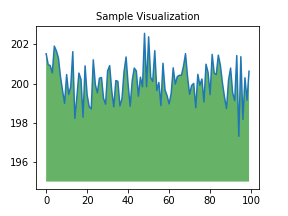

In [ ]:
import numpy as np
import IPython.display as display
from matplotlib import pyplot as plt
import io
import base64

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

fig = plt.figure(figsize=(4, 3), facecolor='w')
plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)
plt.title("Sample Visualization", fontsize=10)

data = io.BytesIO()
plt.savefig(data)
image = F"data:image/png;base64,{base64.b64encode(data.getvalue()).decode()}"
alt = "Sample Visualization"
display.display(display.Markdown(F"""![{alt}]({image})"""))
plt.close(fig)

Los notebooks de Colab ejecutan código en los servidores alojados en la nube de Google, lo que significa que puedes aprovechar al máximo el hardware de Google, incluidas las <a href="#using-accelerated-hardware">GPU y TPU</a>, independientemente de la potencia de tu máquina. Lo único que necesitas es un navegador.

Por ejemplo, si estás esperando que el código de <strong>pandas</strong> termine de ejecutarse y quieres ir más rápido, puedes cambiar a un entorno de ejecución de GPU y usar bibliotecas como <a href="https://rapids.ai/cudf-pandas">RAPIDS cuDF</a> que proporcionan aceleración sin cambios de código.

Para obtener más información sobre la aceleración de pandas en Colab, consulta la <a href="https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cudf_pandas_colab_demo.ipynb">guía de 10 minutos</a> o
 la <a href="https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cudf_pandas_stocks_demo.ipynb">demostración sobre el análisis de datos del mercado de valores de EE.UU.</a>.

<div class="markdown-google-sans">

## Aprendizaje automático
</div>

Colab te permite importar un conjunto de datos de imágenes, entrenar un clasificador de imágenes en él y evaluar el modelo con solo <a href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb">unas pocas líneas de código</a>.

Entre los usos que se la da a Colab en la comunidad de aprendizaje automático, se encuentran los siguientes:
- Introducción a TensorFlow
- Desarrollo y entrenamiento de redes neuronales
- Experimentación con TPU
- Diseminación de investigación de IA
- Creación de instructivos

Para ver notebooks de Colab de ejemplo que muestran los usos del aprendizaje automático, consulta los <a href="#machine-learning-examples">ejemplos</a> que se incluyen a continuación.

<div class="markdown-google-sans">

## Más recursos

### Cómo trabajar con notebooks en Colab

</div>

- [Descripción general de Colab](/notebooks/basic_features_overview.ipynb)
- [Guía para usar Markdown](/notebooks/markdown_guide.ipynb)
- [Cómo importar bibliotecas y luego instalar dependencias](/notebooks/snippets/importing_libraries.ipynb)
- [Cómo guardar y cargar notebooks en GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [Formularios interactivos](/notebooks/forms.ipynb)
- [Widgets interactivos](/notebooks/widgets.ipynb)

<div class="markdown-google-sans">

<a name="working-with-data"></a>
### Cómo trabajar con datos
</div>

- [Cómo cargar datos: Drive, Hojas de cálculo y Google Cloud Storage](/notebooks/io.ipynb)
- [Gráficos: visualización de datos](/notebooks/charts.ipynb)
- [Cómo comenzar a usar BigQuery](/notebooks/bigquery.ipynb)

<div class="markdown-google-sans">

### Aprendizaje automático

<div>

Estos son algunos de los notebooks relacionados con el aprendizaje automático; incluido el curso de aprendizaje automático en línea de Google. Para obtener más información, consulta el <a href="https://developers.google.com/machine-learning/crash-course/">sitio web del curso completo</a>.
- [Introducción a Pandas DataFrame](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Introducción a RAPIDS cuDF para acelerar Pandas](https://nvda.ws/rapids-cudf)
- [Comenzar a usar el modo de acelerador de cuML](https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cuml_sklearn_colab_demo.ipynb)

<div class="markdown-google-sans">

<a name="using-accelerated-hardware"></a>
### Uso de aceleración de hardware
</div>

- [Entrena una CNN para clasificar dígitos escritos a mano en el conjunto de datos MNIST con la API de Flax NNX](https://colab.research.google.com/github/google/flax/blob/main/docs_nnx/mnist_tutorial.ipynb)
- [Entrena un Vision Transformer &#40;ViT&#41; para la clasificación de imágenes con JAX](https://colab.research.google.com/github/jax-ml/jax-ai-stack/blob/main/docs/source/JAX_Vision_transformer.ipynb)
- [Clasificación de texto con un modelo de lenguaje de Transformer con JAX](https://colab.research.google.com/github/jax-ml/jax-ai-stack/blob/main/docs/source/JAX_transformer_text_classification.ipynb)

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### Ejemplos destacados

</div>

- <a href="https://docs.jaxstack.ai/en/latest/JAX_for_LLM_pretraining.html">Entrena un modelo de lenguaje miniGPT con JAX AI Stack</a>
- <a href="https://github.com/google/tunix/blob/main/examples/qlora_gemma.ipynb">Ajuste de LoRA o QLoRA para LLM con Tunix</a>
- <a href="https://keras.io/examples/keras_recipes/parameter_efficient_finetuning_of_gemma_with_lora_and_qlora/">Ajuste eficiente de parámetros de Gemma con LoRA y QLoRA</a>
- <a href="https://keras.io/keras_hub/guides/hugging_face_keras_integration/">Cargando puntos de control de Transformers de Hugging Face</a>
- <a href="https://keras.io/guides/int8_quantization_in_keras/">Cuantización de números enteros de 8 bits en Keras</a>
- <a href="https://keras.io/examples/keras_recipes/float8_training_and_inference_with_transformer/">Entrenamiento e inferencia de Float8 con un modelo de Transformer simple</a>
- <a href="https://keras.io/keras_hub/guides/transformer_pretraining/">Entrenamiento previo de un Transformer desde cero con KerasHub</a>
- <a href="https://keras.io/examples/vision/mnist_convnet/">Red convolucional simple basada en MNIST</a>
- <a href="https://keras.io/examples/vision/image_classification_from_scratch/">Clasificación de imágenes desde cero con Keras 3</a>
- <a href="https://keras.io/keras_hub/guides/classification_with_keras_hub/">Clasificación de imágenes con KerasHub</a>
